# Lepton kinematics

I want to gen-level electron and muon pT, eta, and d0 to show the range of relevant values and provide an understanding of how these quantities depend on bound state mass, dark photon mass, and dark photon proper decay length. I expect the plots produced here will end up in the AN.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

Dark photon pT and eta depend alost entirely on the bound state mass, so hold dark photon mass and ctau constant and plot pT and eta vs bound state mass.

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    # maxchunks=1,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["genE_base", "genMu_base"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

First check that there are exactly 2 gen electrons and muons in each event

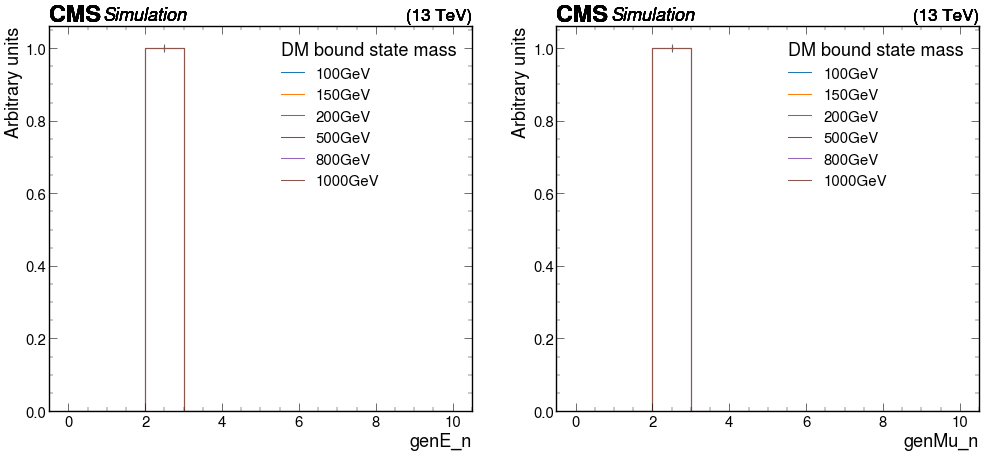

In [3]:
masses = [s.split("_")[1] for s in samples]
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_n"][channels[0], :], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_n"][channels[0], :], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylabel("Arbitrary units")

Next plot pT and eta for all bound-state masses. Plot leading and sub-leading lepton pT separately to show momentum imbalance.

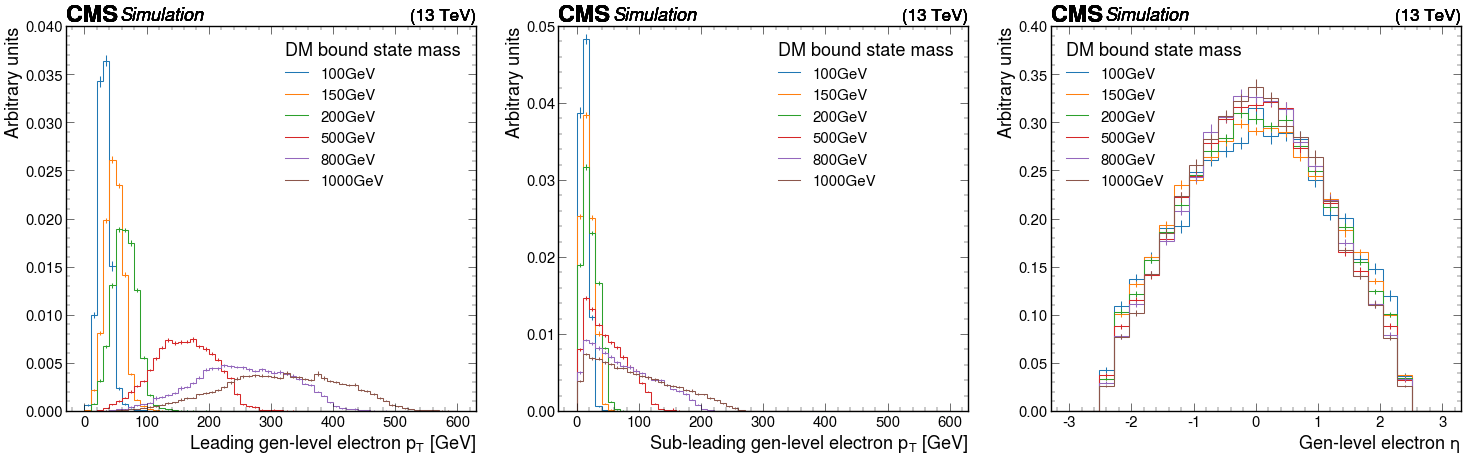

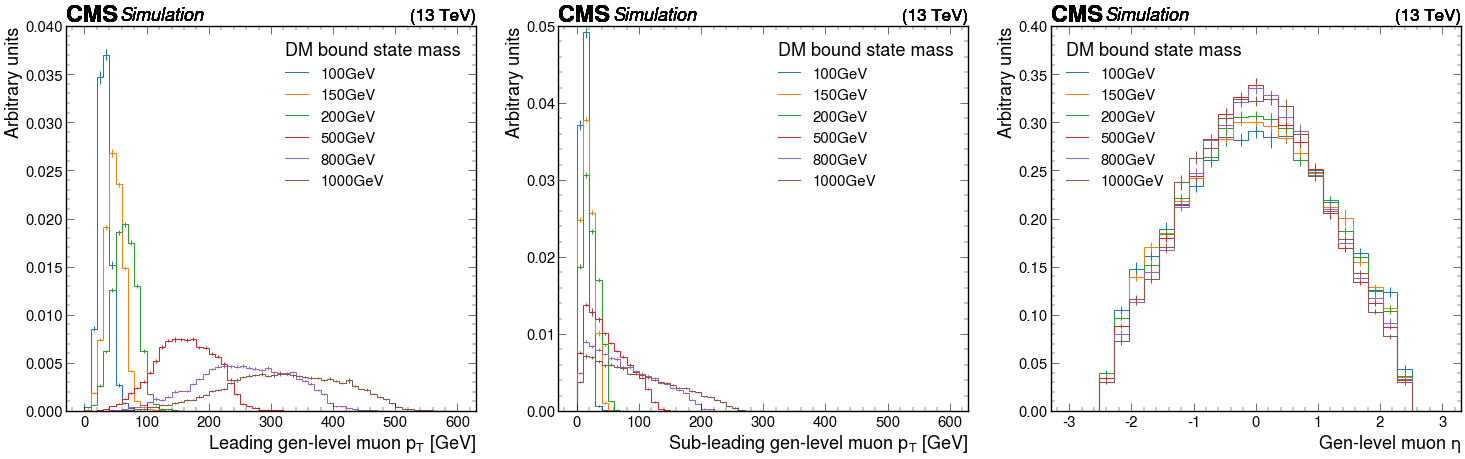

In [4]:
# electrons
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt_highRange"][channels[0], :600j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.04)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt_highRange"][channels[0], :600j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.05)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_eta_phi"][channels[0], ::2j, :].project("genE_eta"), density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left", loc="upper left")
    plt.ylim(0, 0.4)
    plt.ylabel("Arbitrary units")
plt.savefig("../../plots/gen_electron_pt_eta.pdf", bbox_inches="tight")

# muons
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu0_pt_highRange"][channels[0], :600j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.04)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu1_pt_highRange"][channels[0], :600j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.05)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_eta_phi"][channels[0], ::2j, :].project("genMu_eta"), density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left", loc="upper left")
    plt.ylim(0, 0.4)
    plt.ylabel("Arbitrary units")
plt.savefig("../../plots/gen_muon_pt_eta.pdf", bbox_inches="tight")

Also zoom in on low-pT range for leading and subleading pT

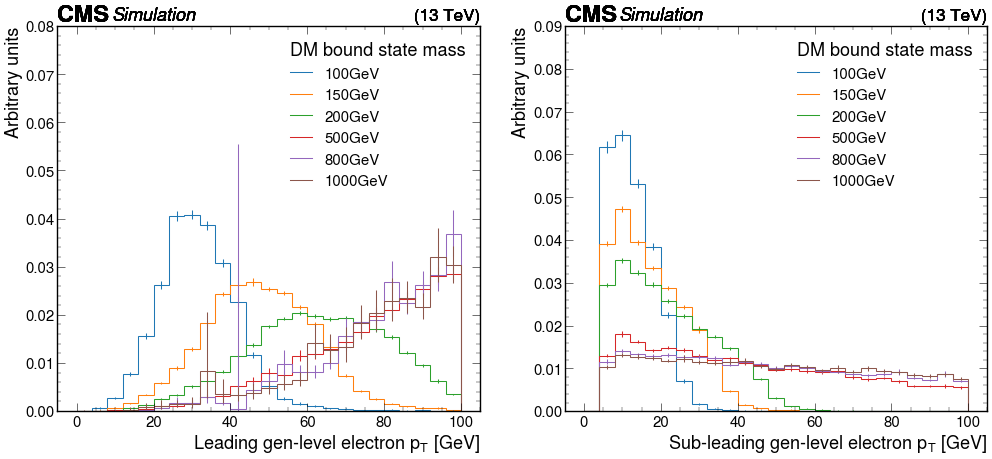

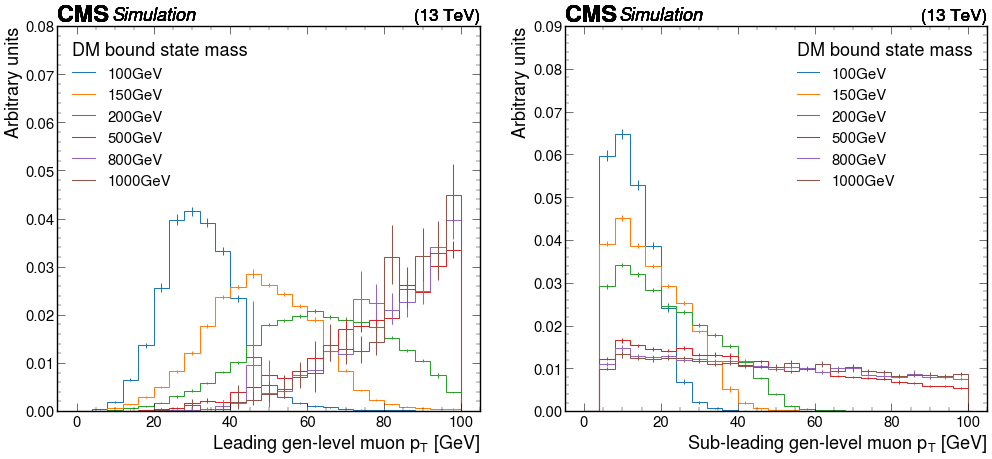

In [5]:
# electrons
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt"][channels[0], :100j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.08)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt"][channels[0], :100j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.09)
    plt.ylabel("Arbitrary units")

# muons
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu0_pt"][channels[0], :100j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.08)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu1_pt"][channels[0], :100j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.09)
    plt.ylabel("Arbitrary units")

The pT imbalance between leading and subleading leptons sure is significant. I expect the trigger will be a serious source of inefficiency for 2mu2e events with bound state mass <500GeV. I think we should make sure to understand why the pT imbalance is so big.

My expectation is that the pT distributions won't meaningfully depend on the dark photon mass, but I should check.

In [6]:
dp_samples = [
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_5GeV_40mm",
]
dp_fileset = utilities.make_fileset(dp_samples, "ffntuple_v4")

dp_output = runner.run(dp_fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
dp_out = dp_output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

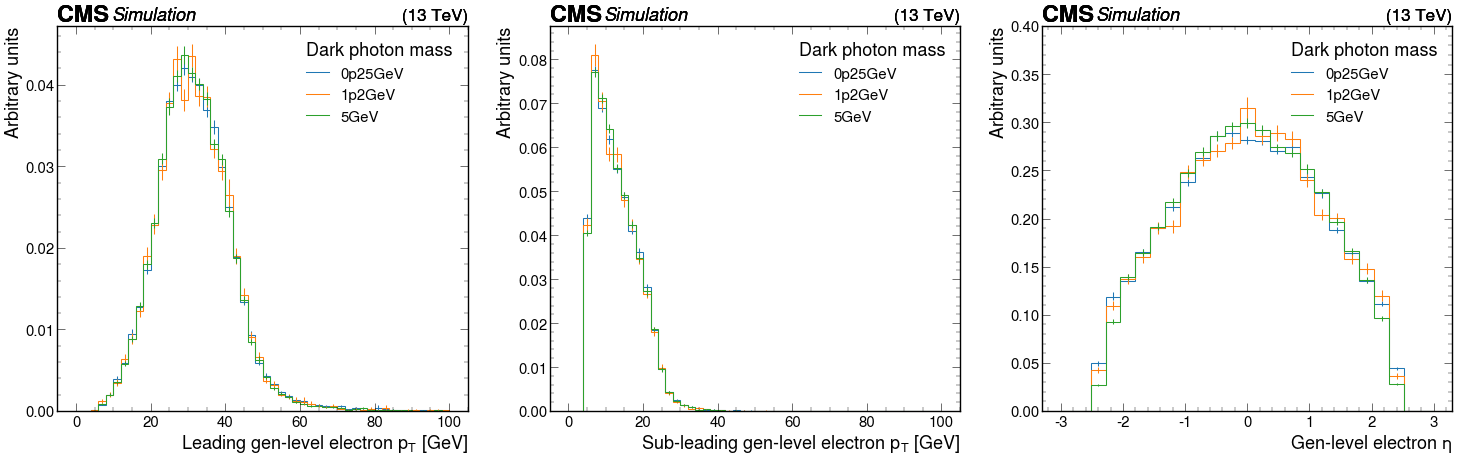

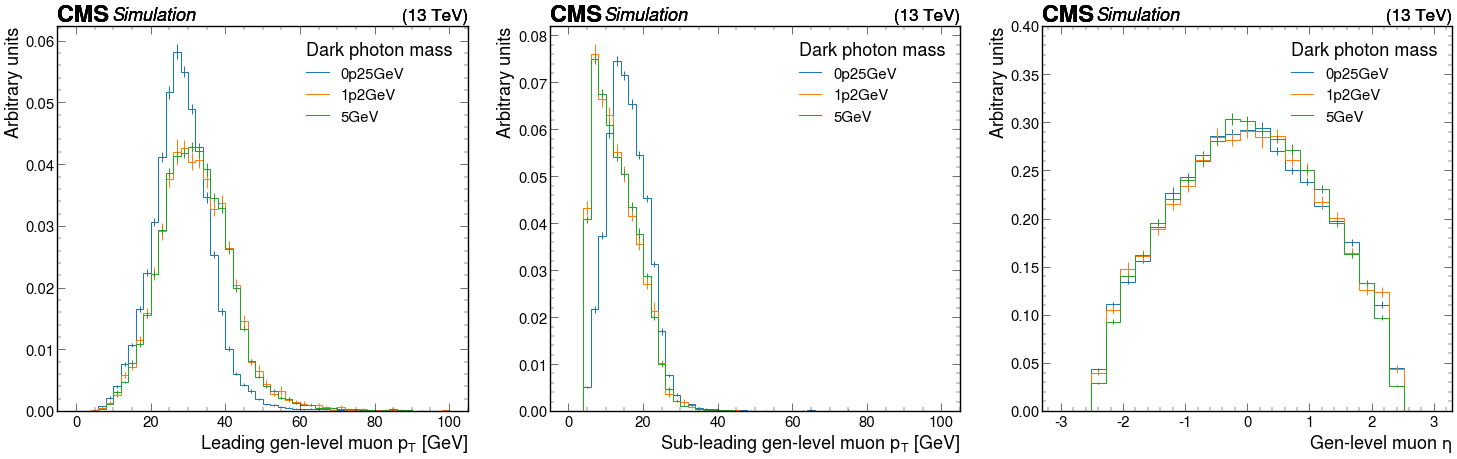

In [7]:
dp_masses = [s.split("_")[2] for s in dp_samples]
# electrons
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genE0_pt"][channels[0], :100j], density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    #plt.ylim(0, 0.04)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genE1_pt"][channels[0], :100j], density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    #plt.ylim(0, 0.05)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 3)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genE_eta_phi"][channels[0], ::2j, :].project("genE_eta"), density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    plt.ylim(0, 0.4)
    plt.ylabel("Arbitrary units")
plt.savefig("../../plots/gen_electron_pt_eta.pdf", bbox_inches="tight")

# muons
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genMu0_pt"][channels[0], :100j], density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    #plt.ylim(0, 0.04)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genMu1_pt"][channels[0], :100j], density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    #plt.ylim(0, 0.05)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 3)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genMu_eta_phi"][channels[0], ::2j, :].project("genMu_eta"), density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    plt.ylim(0, 0.4)
    plt.ylabel("Arbitrary units")
plt.savefig("../../plots/gen_muon_pt_eta.pdf", bbox_inches="tight")

Ah, dark photon mass is relevant for muons when it falls below twice the muon mass. I don't understand why the pT imbalance decreases in this case. Maybe there's an an boost/decay-angle/transverse-plane thing going on? Maybe the deltaEta between leptons can tell us something.

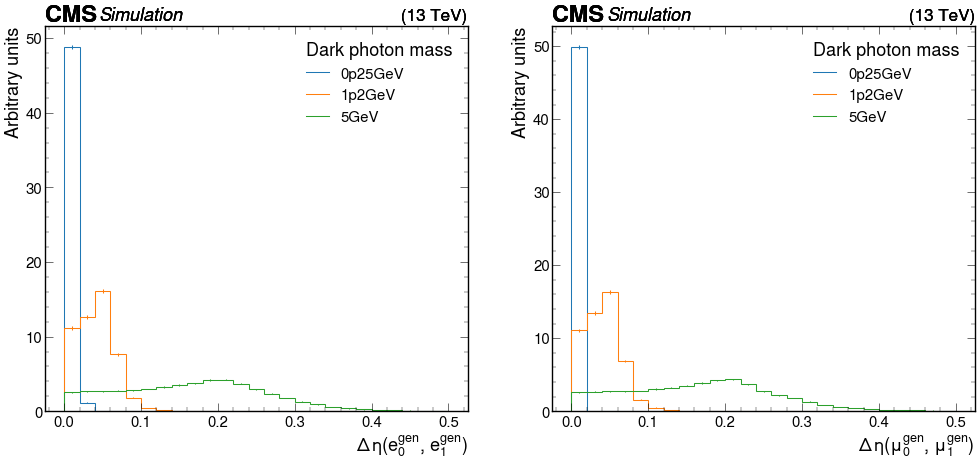

In [8]:
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genE_genE_dEta"][channels[0], :0.5j], density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    #plt.ylim(0, 0.04)
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in dp_samples:
    utilities.plot(dp_out[sample]["hists"]["genMu_genMu_dEta"][channels[0], :0.5j], density=True)
    plt.legend(dp_masses, title="Dark photon mass", alignment="left")
    #plt.ylim(0, 0.04)
    plt.ylabel("Arbitrary units")

Hmm, $\Delta\eta$ behaves the same for electrons and muons, so I don't think that's the culprit here. Maybe I have to zoom way in to see detail in the <0.1 region though